<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M1-Linear-Algebra-Optimization-Regularization-V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3: Optimization and Regularization

In [ ]:
# @title Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

# Section 1 Cost Function

As part of this tutorial, we'll learn how gradient descent can be used to optimize cost functions (i.e., to find the parameters associated with the lowest error) based on derivatives.
 - define a cost function used for linear regression
 - implement a prediction function
 - evaluate the error with a cost function
 - use the derivative of this cost function to optimize the parameters of the
 model.

## Section 1.1 Norm

Similarly to humans, models require feedback to learn a new skill. In order to improve, you can try something, use the feedback to evaluate your performance, and then iterate until the feedback is positive.


- You first need a way to assess its performances. The loss is a value that tells you how badly the model performs for a given data sample.
- Errors are represented in red: it is the difference between the estimated value (the point on the line) and the true value.
- There are multiple ways to
calculate a distance. In ML, we use Norm for calculating a distance. A norm is a function that takes a vector and returns its length. It is denoted with double vertical bars: 
$$
||\vec{u}||
$$


There are different types of Norm functions, but these two are commonly used:
- > $L^1$ Norm: is also called the *Manhattan distance* or the *taxicab distance* because of the displacement of a taxi in a street grid, like
in Manhattan.

$$
\begin{aligned}
||\vec{u}||_1 &= \left(\sum_{i=1}^m \left| {u}_i \right| ^1 \right)^{\frac{1}{1}}
= \sum_{i=1}^m \left| {u}_i \right|
\end{aligned}
$$

- > $L^2$ Norm: The vector length measured with the $L^2$ norm corresponds to an *Euclidean distance*, that is, the physical distance in the real world,
which is a consequence of the Pythagorean theorem. The formula is as
follows:

$$
\begin{aligned}
||\vec{u}||_2 &= \left(\sum_{i=1}^m \left| {u}_i \right|^2 \right)^{\frac{1}{2}}
= \sqrt{\sum_{i=1}^m \left| {u}_i \right|^2}
= \sqrt{\sum_{i=1}^m{u}_i^2}
\end{aligned}
$$


In [ ]:
u = np.array([2, 1])
np.linalg.norm(u, ord=1)

3.0

In [ ]:
np.linalg.norm(u, ord=2)

2.23606797749979

In [ ]:
np.sqrt(u@u)

2.23606797749979

## 1.2 Mathematical Definition of the Cost Function

The Mean Squared Error (MSE) loss is defined as follows:

$$
L=(\hat{y} - y)^2
$$

with $\hat{y}$ (pronounced “y hat”) being the estimated value and $y$
the true value. So the difference $\hat{y}-y$ corresponds to the error
made by the model.

![](https://baptiste-monpezat.github.io/6f5cc892ec345d96f64c881b62b0d910/gradient_descent_parameter_a.gif)

Generally, loss functions refer to errors calculated on one training example, while cost functions refer to the error calculated over all training examples.




> **Prediction Function:** It is called the prediction function, hypothesis function, or simply the model. In the case of linear regression, the predicted value $\hat{y}$ is calculated with a linear function (the assumption is that a line could fit our data well):

$$
\hat{y}=\theta x
$$




> **Loss Function:** If you replace $\hat{y}$ in the loss function, you get:

$$
L = (\hat{y} - y)^2 = (\theta x - y)^2
$$





> **Cost Function:** To calculate the Mean Squared Error, let’s calculate the averaged loss across data samples. Mathematically, the cost function, usually denoted as $J(\theta)$, is written as:

$$
J(\theta) = \frac{1}{2m}\sum_{i=1} ^m (\theta \vec{x}^{(i)} - \vec{y}^{(i)})^2
$$



The Sigma notation ($\sum$) means that you take the sum over every $i$
training example until $m$.

# Section 2 Optimization






The optimization process involves training and evaluating a model iteratively until an optimal or satisfactory solution (result) is obtained. To find an absolute minimum in the cost function, the first derivative test is commonly used. Using the first derivative test requires the derivative of the function to be always:

*   Negative on one side of a point
*   Zero at the point
*   Positive on the other side

In [ ]:
import IPython
iframe = '<iframe src="https://www.desmos.com/calculator/m818n6q7zg" width="1000px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>'
IPython.display.HTML(iframe)

/usr/local/lib/python3.7/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Let’s write an implementation of the MSE:

In [ ]:
def MSE(x, y, theta):
    m = y.shape[0]
    cost = (1 / (2 * m)) * np.sum((theta * x - y) ** 2)
    return cost

Derivative of the Cost Function indicates the direction of  𝑥 needed to maximize or minimize the function

$$
\begin{aligned}
\frac{d J(\theta)}{d\theta} &= \frac{1}{2m}\sum_{i=1} ^m 2 (\theta x^{(i)} - y^{(i)}) \cdot x^{(i)} \\\\
&= \frac{1}{m}\sum_{i=1} ^m (\theta x^{(i)} - y^{(i)}) \cdot x^{(i)}
\end{aligned}
$$



In [ ]:
def MSE_derivative(x, y, theta):
    m = y.shape[0]
    cost_derivative = (1 / m) * np.sum((theta * x - y) * x)
    return cost_derivative

The function $\frac{d J}{d\theta}$ takes the parameter $\theta$ as input
and returns the slope of the tangent of the cost function for this value
of $\theta$. The slope tells you the direction that you must take to
minimize the cost. For instance, the slope of the
tangent line at $\theta = 0$ is negative. It means that you need to
increase the value of $\theta$ to reach the minimum of the cost
function. Conversely, the slope of the tangent is positive for
$\theta = 3$, meaning that the value of $\theta$ that minimizes the cost
is smaller than three.



*   **The slope of the tangent is positive:** It means that you need to
decrease the value of $\theta$ to reach the minimum of the cost
function.



![](https://miro.medium.com/max/1400/1*rEXxyndPpGuOwe-lBCOTow.gif)

*   **The slope of the tangent is negative:** It means that you need to
increase the value of $\theta$ to reach the minimum of the cost
function.


![](https://miro.medium.com/max/1400/1*iWRgqnhWm5CBt-0Pi6hzbg.gif)

In [ ]:
x = np.array([-0.5, 0, 1])
y = np.array([-1, 0, 2])
MSE_derivative(x, y, 3)

0.41666666666666663

In [ ]:
MSE_derivative(x, y, 2)

0.0

In [ ]:
MSE_derivative(x, y, 1)

-0.41666666666666663


we give a value of $\theta$ and arrays containing the $x$ values and
the $y$ values, and the function returns the slope of the tangent of the
cost function for this $\theta$.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/HamidBekamiri/Linear-Algebra/main/df_advertising.csv')
data = data[['TV', 'Sales']]
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
data.shape

(200, 2)

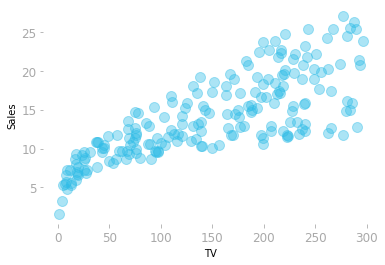

In [ ]:
plt.scatter(data['TV'], data['Sales'], alpha=0.4)
# [...] Add axes, labels etc.

plt.xlabel("TV")
plt.ylabel("Sales")

plt.show()

In [ ]:
X = data['TV'].to_numpy().reshape(-1, 1)
X.shape

(200, 1)

In [ ]:
y = data['Sales'].to_numpy().reshape(-1, 1)
y.shape

(200, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
y = standard_scaler.fit_transform(y)

In [ ]:
MSE_derivative(x=X, y=y, theta=0.66775)

-0.1144744248616065

In [ ]:
lr = 0.01
theta = 0
theta = theta - lr * MSE_derivative(x=X, y=y, theta=theta)
theta

0.007822244248616064

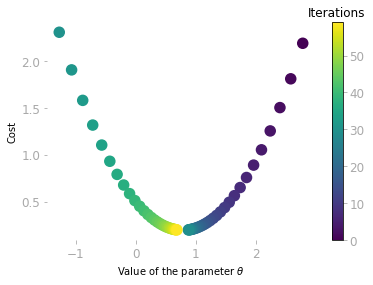

In [ ]:
lr = 0.1
theta = 3

theta_all = []
cost_all = []

for i in range(30):
    theta = theta - lr * MSE_derivative(x=X, y=y, theta=theta)
    cost = MSE(X, y, theta)
    
    theta_all.append(theta)
    cost_all.append(cost)

lr = 0.1
theta = -1.5
for i in range(30):
    theta = theta - lr * MSE_derivative(x=X, y=y, theta=theta)
    cost = MSE(X, y, theta)
    
    theta_all.append(theta)
    cost_all.append(cost)

plt.scatter(theta_all, cost_all, linewidth=1.5, c=np.arange(len(cost_all)))

plt.xlabel(r"Value of the parameter $\theta$")
plt.ylabel("Cost")
clb = plt.colorbar()
clb.ax.set_title('Iterations')
plt.show()

In [ ]:
best_slope = theta_all[-1]
best_slope

0.6854782880477339

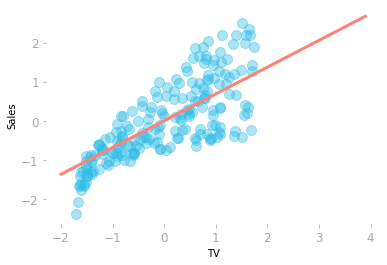

In [ ]:
x_axis = np.arange(-2, 4, 0.1)
y_axis = best_slope * x_axis
plt.scatter(X, y, alpha=0.4, zorder=0)
plt.plot(x_axis, y_axis, c='#FF8177')

plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

# Section 3 Regularization

When you apply machine learning or deep learning to new data, you might find that your model performs well on your training data but not on your test data. A model may describe the training data very well, even taking into account noise or specifics in the dataset. Overfitting is the result of this. Often, parameter values (in this case slope and intercept $\theta, b$) are large in overfitting models. 

This problem can be addressed in two ways:
- Increasing the size of the training dataset to compensate this sensitivity. 
- Regularization by constraining parameter values to be small in order to avoid too sensitive models. The machine learning algorithms prefer a solution that is suboptimal on the training set but generally more effective.


How does Regularization work? The model learns the best parameter values according to the loss function. Regularization punishes large parameter values by adding an extra term to the loss function. Using this term, you can restrict the parameters' values. Large parameter values will increase the loss, and thus the model will try to fit the data with small parameters.

The regularization term is constructed as the norm of the vector containing all the parameter values. 

For cost functions, you calculate the norm of an “error vector”. What we
loosely call an error vector here is a vector containing the errors of a
model (the differences between the values estimated by the model and the
true values). The length of this vector tells you the overall quality of
the fit.

With regularization, you calculate the norm of the “parameter vector”
(the vector that contains all parameter values). The norm of this vector
tells you how large the overall parameter values are.


$$
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1} ^m (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2 + \alpha \sum_{i=1}^n \left| \theta_i \right|
$$


Regularized models are often sensitive to differences in scale in the data, so you need to normalize the data. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X_transformed = scaler.transform(X)
# y_dk_noise_transformed = scaler.transform(y_dk.reshape(-1, 1)).flatten()
y_transformed = scaler.transform(y.reshape(-1, 1)).flatten()

![](https://miro.medium.com/max/1200/0*4J2Bm1g7_DR47u-g.png)

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(10, include_bias=False)
X_poly = poly.fit_transform(X_transformed)

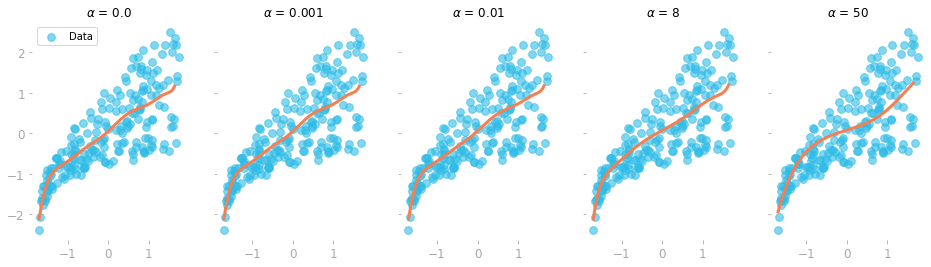

In [ ]:
from sklearn.linear_model import Ridge

X_axis = np.arange(-1.7, 1.65, 0.01)
X_axis_poly = poly.fit_transform(X_axis.reshape(-1, 1))

f, axes = plt.subplots(1, 5, figsize=(16, 4), sharey=True)


count = 0

for alpha, ax in zip([0.00000, 0.001, 0.01, 8, 50], axes.flatten()):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_poly, y_transformed)
    y_axis_ridge = ridge.predict(X_axis_poly)

    ax.plot(X_axis_poly[:, 0], y_axis_ridge, c="#F57F53")
    ax.scatter(X_transformed, y_transformed,
                alpha=0.6, s=60, label="Data")
    # ax.scatter(X_transformed, y_transformed,
    #             alpha=0.6, s=60, label="Data with noise")
    ax.set_title(r"$\alpha$" + f" = {alpha}")
    # [...] Figure titles, legend...
    
    if count ==  0:
        ax.legend()
    count += 1
    



# Section 4 Hands-on Project: Polynomial regression to model the total number of cases of COVID-19 in Denmark

In [ ]:
data_covid_all = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [ ]:
data_covid_dk = data_covid_all[(data_covid_all['location'] == 'Denmark')][55:85]
data_covid_dk.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
51577,DNK,Europe,Denmark,2020-03-28,2201.0,155.0,125.000,65.0,13.0,7.429,375.967,26.477,21.352,11.103,2.221,1.269,1.43,121.0,20.669,NaN,NaN,NaN,NaN,546.0,93.266,22176.0,1383.0,3.788,0.236,1322.0,0.226,0.0946,10.6,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,5854240.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
51578,DNK,Europe,Denmark,2020-03-29,2395.0,194.0,142.857,72.0,7.0,8.429,409.105,33.138,24.402,12.299,1.196,1.440,1.43,131.0,22.377,NaN,NaN,NaN,NaN,555.0,94.803,23477.0,1301.0,4.010,0.222,1431.0,0.244,0.0998,10.0,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,5854240.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,-1117.0,-7.37,-0.29,-190.80188
51579,DNK,Europe,Denmark,2020-03-30,2577.0,182.0,161.000,77.0,5.0,7.571,440.194,31.089,27.501,13.153,0.854,1.293,1.43,137.0,23.402,NaN,NaN,NaN,NaN,538.0,91.899,26695.0,3218.0,4.560,0.550,1731.0,0.296,0.0930,10.8,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,5854240.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
51580,DNK,Europe,Denmark,2020-03-31,2860.0,283.0,181.286,90.0,13.0,8.286,488.535,48.341,30.967,15.373,2.221,1.415,1.41,145.0,24.768,NaN,NaN,NaN,NaN,508.0,86.775,29904.0,3209.0,5.108,0.548,2029.0,0.347,0.0893,11.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,5854240.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN
51581,DNK,Europe,Denmark,2020-04-01,3107.0,247.0,197.571,104.0,14.0,10.000,530.726,42.192,33.748,17.765,2.391,1.708,1.39,146.0,24.939,NaN,NaN,NaN,NaN,478.0,81.650,33462.0,3558.0,5.716,0.608,2341.0,0.400,0.0844,11.8,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,5854240.0,136.52,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.5,80.9,0.94,NaN,NaN,NaN,NaN


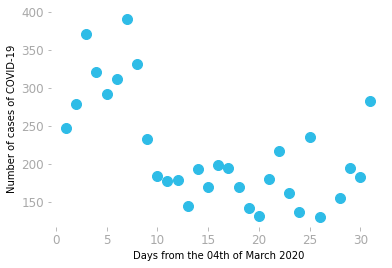

In [ ]:
data_covid_dk['days'] = data_covid_dk["date"].str.split("-").apply(lambda x: x[2]).astype(int)

plt.scatter(data_covid_dk['days'], data_covid_dk["new_cases"])

plt.xlabel("Days from the 04th of March 2020")
plt.ylabel("Number of cases of COVID-19")
plt.show()

In [ ]:
X_dk = data_covid_dk['days'].to_numpy().reshape(-1, 1)
y_dk = data_covid_dk["new_cases"].to_numpy().reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_dk = standard_scaler.fit_transform(X_dk)
y_dk = standard_scaler.fit_transform(y_dk)

In [ ]:
MSE_derivative(x=X_dk, y=y_dk, theta=0.66775)

1.25516204780681

In [ ]:
lr = 0.01
theta = 0
theta = theta - lr * MSE_derivative(x=X_dk, y=y_dk, theta=theta)
theta

-0.005874120478068099

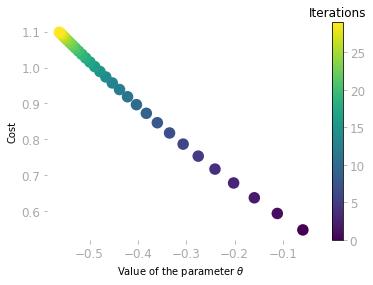

In [ ]:
lr = 0.1
theta = 0

theta_all = []
cost_all = []

for i in range(30):
    theta = theta - lr * MSE_derivative(x=X_dk, y=y_dk, theta=theta)
    cost = MSE(X, y, theta)
    
    theta_all.append(theta)
    cost_all.append(cost)
    
plt.scatter(theta_all, cost_all, linewidth=1.5, c=np.arange(len(cost_all)))

plt.xlabel(r"Value of the parameter $\theta$")
plt.ylabel("Cost")
clb = plt.colorbar()
clb.ax.set_title('Iterations')
plt.show()

In [ ]:
best_slope = theta_all[-1]
best_slope

-0.5625109707154626

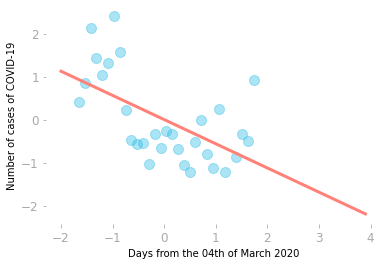

In [ ]:
x_axis = np.arange(-2, 4, 0.1)
y_axis = best_slope * x_axis
plt.scatter(X_dk, y_dk, alpha=0.4, zorder=0)
plt.plot(x_axis, y_axis, c='#FF8177')

plt.xlabel("Days from the 04th of March 2020")
plt.ylabel("Number of cases of COVID-19")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_dk)
X_dk_transformed = scaler.transform(X_dk)
# y_dk_noise_transformed = scaler.transform(y_dk.reshape(-1, 1)).flatten()
y_dk_transformed = scaler.transform(y_dk.reshape(-1, 1)).flatten()

![](https://i0.wp.com/www.nullplug.org/ML-Blog/wp-content/uploads/2017/10/compressed_polyreg_normal.gif?resize=640%2C480)

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(10, include_bias=False)
X_dk_poly = poly.fit_transform(X_dk_transformed)

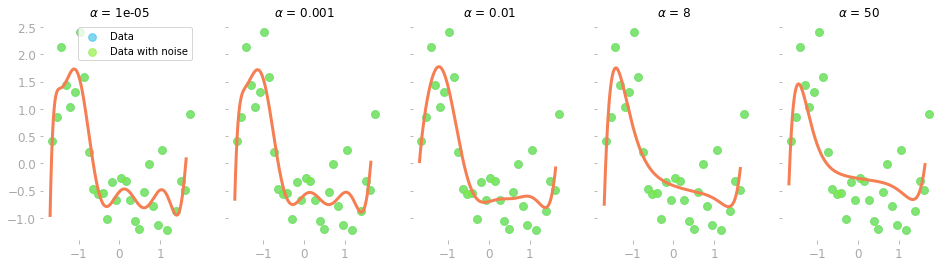

In [ ]:
from sklearn.linear_model import Ridge

X_axis = np.arange(-1.7, 1.65, 0.01)
X_axis_poly = poly.fit_transform(X_axis.reshape(-1, 1))

f, axes = plt.subplots(1, 5, figsize=(16, 4), sharey=True)


count = 0

for alpha, ax in zip([0.00001, 0.001, 0.01, 8, 50], axes.flatten()):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_dk_poly, y_dk_transformed)
    y_axis_ridge = ridge.predict(X_axis_poly)

    ax.plot(X_axis_poly[:, 0], y_axis_ridge, c="#F57F53")
    ax.scatter(X_dk_transformed, y_dk_transformed,
                alpha=0.6, s=60, label="Data")
    ax.scatter(X_dk_transformed, y_dk_transformed,
                alpha=0.6, s=60, label="Data with noise")
    ax.set_title(r"$\alpha$" + f" = {alpha}")
    # [...] Figure titles, legend...
    
    if count ==  0:
        ax.legend()
    count += 1
    